In [99]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [100]:
baseDP = pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv', sep=';', encoding='latin1')
baseDP 

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,0,...,NaN,NaN,21,2,0,0,0,0,578,3
1,4,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,15,6,0,1,0,0,441,3
2,5,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,47,2,1,0,0,0,637,3
3,6,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,6,...,NaN,NaN,26,2,1,0,0,0,473,3
4,7,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,4,...,NaN,NaN,10,1,3,0,0,0,147,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36761,159,9,2025,2025m09,35,4,Cachoeiras de Macacu,3300803,Interior,0,...,3.0,0.0,25,0,0,0,0,0,173,2
36762,165,9,2025,2025m09,33,5,Mangaratiba,3302601,Interior,0,...,4.0,0.0,30,0,0,0,0,0,226,2
36763,166,9,2025,2025m09,33,5,Angra dos Reis,3300100,Interior,2,...,20.0,1.0,73,15,0,0,0,0,635,2
36764,167,9,2025,2025m09,43,5,Paraty,3303807,Interior,1,...,3.0,1.0,15,4,1,0,0,0,242,2


In [101]:
baseDP['regiao'].unique()


array(['Capital', 'Baixada Fluminense', 'Interior',
       'Grande NiterÃ\x83Â³i', 'Grande NiterÃ³i'], dtype=object)

In [102]:
print("Colunas disponíveis:")
print(baseDP.columns.tolist())

Colunas disponíveis:
['cisp', 'mes', 'ano', 'mes_ano', 'aisp', 'risp', 'munic', 'mcirc', 'regiao', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli', 'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom', 'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa', 'roubo_transeunte', 'roubo_celular', 'roubo_em_coletivo', 'roubo_rua', 'roubo_veiculo', 'roubo_carga', 'roubo_comercio', 'roubo_residencia', 'roubo_banco', 'roubo_cx_eletronico', 'roubo_conducao_saque', 'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular', 'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro', 'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas', 'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor', 'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca', 'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada', 'pol_militares_mortos_serv', 'pol_c

In [103]:
# Ver valores únicos das colunas de área
print("AISPs únicas:", baseDP['aisp'].unique())
print("CISPs únicas:", baseDP['cisp'].unique())

AISPs únicas: [ 5  1  2 19 23 36  4  6 22 16  3  9 14 18 31 27 17 24 20 15 34 35  7 12
 10 28 30 26 11 25  8 37 29 32 13 39 21 38 33 40 41 43]
CISPs únicas: [  1   4   5   6   7   9  10  12  13  14  15  16  17  18  19  20  21  22
  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  44  48  50  51  52  53  54  55  56  57  58  59  60  61  62  64  65
  66  71  72  73  74  75  76  77  78  79  81  82  88  89  90  91  92  93
  94  95  96  97  98  99 100 104 105 106 107 108 109 110 111 112 118 119
 120 121 122 123 124 125 126 127 128 129 134 135 136 137 138 139 140 141
 142 143 144 145 146 151 152 153 154 155 156 157 158 159 165 166 167 168
  43 147  63 101 130  42 148  67  70 132  11  45]


In [104]:
baseDP_apreenssao = baseDP['aaapai']
baseDP_apreenssao


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
36761    0.0
36762    1.0
36763    3.0
36764    3.0
36765    1.0
Name: aaapai, Length: 36766, dtype: float64

In [105]:
print(baseDP_ordenada[['munic', 'aaapai']].head(10))

NameError: name 'baseDP_ordenada' is not defined

In [ ]:
baseDP_baixada = baseDP[baseDP['regiao'] == 'Baixada Fluminense']
baseDP_baixada.head(20)



,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
38,48,1,2003,2003m01,24,3,Seropédica,3305554,Baixada Fluminense,4,...,NaN,NaN,28,0,1,0,0,0,139,3
39,50,1,2003,2003m01,24,3,Itaguaí,3302007,Baixada Fluminense,7,...,NaN,NaN,79,3,0,0,0,0,246,3
40,51,1,2003,2003m01,24,3,Paracambi,3303609,Baixada Fluminense,2,...,NaN,NaN,26,2,0,0,0,0,91,3
41,52,1,2003,2003m01,20,3,Nova Iguaçu,3303500,Baixada Fluminense,6,...,NaN,NaN,94,1,1,0,0,0,585,3
42,53,1,2003,2003m01,20,3,Mesquita,3302858,Baixada Fluminense,8,...,NaN,NaN,89,4,1,0,0,0,372,3
43,54,1,2003,2003m01,20,3,Belford Roxo,3300456,Baixada Fluminense,20,...,NaN,NaN,211,15,2,0,0,0,703,3
44,55,1,2003,2003m01,24,3,Queimados;Japeri,9999981,Baixada Fluminense,11,...,NaN,NaN,49,12,0,0,0,0,268,3
45,56,1,2003,2003m01,20,3,Nova Iguaçu,3303500,Baixada Fluminense,27,...,NaN,NaN,89,9,0,0,0,0,380,3
46,57,1,2003,2003m01,20,3,Nilópolis,3303203,Baixada Fluminense,5,...,NaN,NaN,74,6,0,0,0,0,447,3
47,58,1,2003,2003m01,20,3,Nova Iguaçu,3303500,Baixada Fluminense,29,...,NaN,NaN,128,6,1,0,0,0,569,3


In [ ]:
apreensoes_municipio = baseDP_baixada.groupby('munic')['aaapai'].sum().reset_index()
apreensoes_municipio = apreensoes_municipio.sort_values(by='aaapai', ascending=False)
apreensoes_municipio

,munic,aaapai
1,Duque de Caxias,6233.0
9,Nova Iguaçu,4098.0
14,São João de Meriti,2953.0
0,Belford Roxo,2584.0
5,Magé,1251.0
7,Mesquita,1218.0
3,Itaguaí,881.0
8,Nilópolis,693.0
11,Queimados,573.0
4,Japeri,402.0


In [ ]:

valores = np.array(apreensoes_municipio["aaapai"])
media = np.mean(valores)
mediana = np.median(valores)
q1 = np.percentile(valores, 25)
q3 = np.percentile(valores, 75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

print("=== Estatísticas ===")
print(f"Média: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Q1 (25%): {q1:.2f}")
print(f"Q3 (75%): {q3:.2f}")
print(f"IQR: {iqr:.2f}")
print(f"Limite superior (outliers): {limite_superior:.2f}")


outliers = apreensoes_municipio[
    apreensoes_municipio["aaapai"] > limite_superior
]

print("\nMunicípios que destoam (acima do limite superior):")
print(outliers)

outliers.to_csv('outliers_apreensoes_baixada.csv', index=False, sep=';')



In [ ]:
import random

vendedores = [
    "Lionel Messi",
    "Cristiano Ronaldo",
    "Neymar Jr",        
    "Kylian Mbappé",
    "Erling Haaland",
    "Kevin De Bruyne",
    "Mohamed Salah",
    "Harry Kane",
    "Vinícius Jr.",
    "Luka Modrić",
    "Robert Lewandowski",
    "Jude Bellingham",
    "Antoine Griezmann",
    "Bernardo Silva",
    "Virgil van Dijk",
    "Pedri",
    "Rodri",
    "Bruno Fernandes",
    "Son Heung-min",
    "João Félix",
    "Marcus Rashford",
    "Bukayo Saka",
    "Achraf Hakimi",
    "Jamal Musiala",
    "Lautaro Martínez",
    "Eduardo Camavinga",
    "Frenkie de Jong",
    "Rafael Leão",
    "Declan Rice",
    "Thibaut Courtois"
]

valores_vendidos = [random.randint(1000, 1000000) for i in vendedores]

valores_vendidos.append(3000000)
vendedores.append("Pedro")

dados_vendas = {'vendedores': vendedores, 'valores_vendidos': valores_vendidos}

df = pd.DataFrame(dados_vendas)
df.sort_values(by='valores_vendidos', ascending=False, inplace=True)
df

,vendedores,valores_vendidos
30,Pedro,3000000
11,Jude Bellingham,983962
20,Marcus Rashford,934902
5,Kevin De Bruyne,920714
18,Son Heung-min,899425
6,Mohamed Salah,883839
25,Eduardo Camavinga,852064
2,Neymar Jr,846550
0,Lionel Messi,758539
4,Erling Haaland,661969


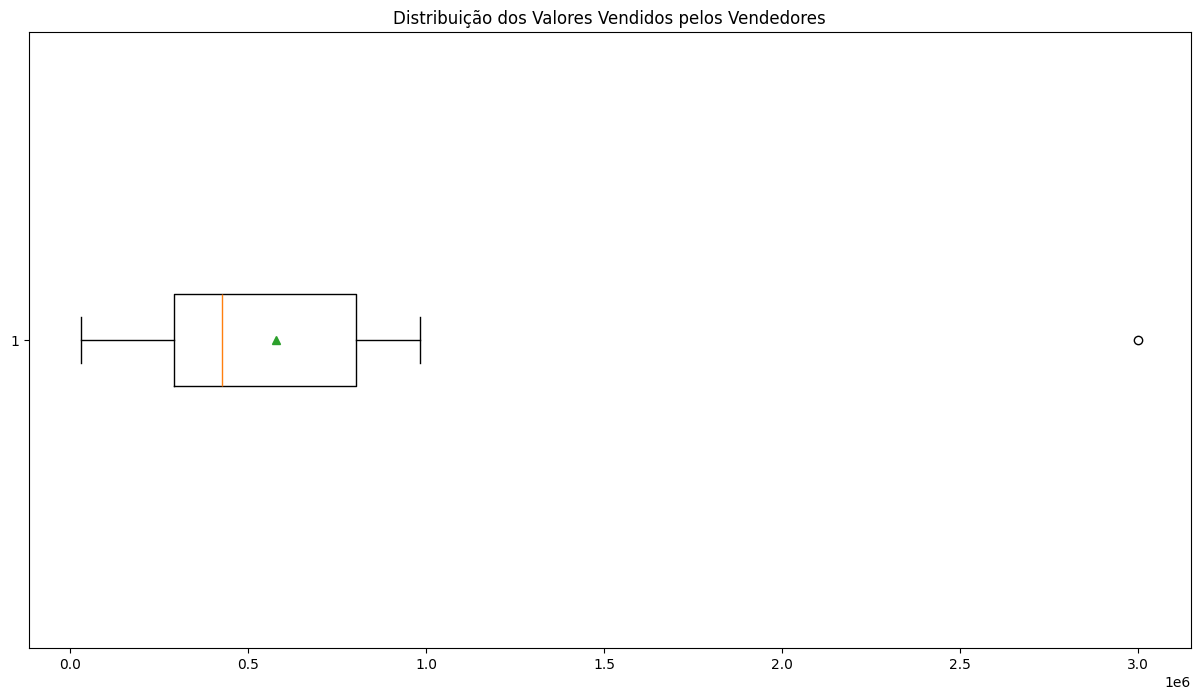

In [ ]:
valores_vendidos_array = np.array(df['valores_vendidos'])

plt.figure(figsize=(15, 8))
plt.boxplot(valores_vendidos_array, vert=False, showmeans=True)
plt.title('Distribuição dos Valores Vendidos pelos Vendedores')
plt.show()


['Vendedor 1', 'Vendedor 2', 'Vendedor 3', 'Vendedor 4', 'Vendedor 5', 'Vendedor 6', 'Vendedor 7', 'Vendedor 8', 'Vendedor 9', 'Vendedor 10', 'Vendedor 11', 'Vendedor 12', 'Vendedor 13', 'Vendedor 14', 'Vendedor 15', 'Vendedor 16', 'Vendedor 17', 'Vendedor 18', 'Vendedor 19', 'Vendedor 20', 'Vendedor 21', 'Vendedor 22', 'Vendedor 23', 'Vendedor 24', 'Vendedor 25', 'Vendedor 26', 'Vendedor 27', 'Vendedor 28', 'Vendedor 29', 'Vendedor 30', 'Vendedor 31', 'Vendedor 32', 'Vendedor 33', 'Vendedor 34', 'Vendedor 35', 'Vendedor 36', 'Vendedor 37', 'Vendedor 38', 'Vendedor 39', 'Vendedor 40', 'Vendedor 41', 'Vendedor 42', 'Vendedor 43', 'Vendedor 44', 'Vendedor 45', 'Vendedor 46', 'Vendedor 47', 'Vendedor 48', 'Vendedor 49', 'Vendedor 50', 'Vendedor 51', 'Vendedor 52', 'Vendedor 53', 'Vendedor 54', 'Vendedor 55', 'Vendedor 56', 'Vendedor 57', 'Vendedor 58', 'Vendedor 59', 'Vendedor 60', 'Vendedor 61', 'Vendedor 62', 'Vendedor 63', 'Vendedor 64', 'Vendedor 65', 'Vendedor 66', 'Vendedor 67', 'Ve

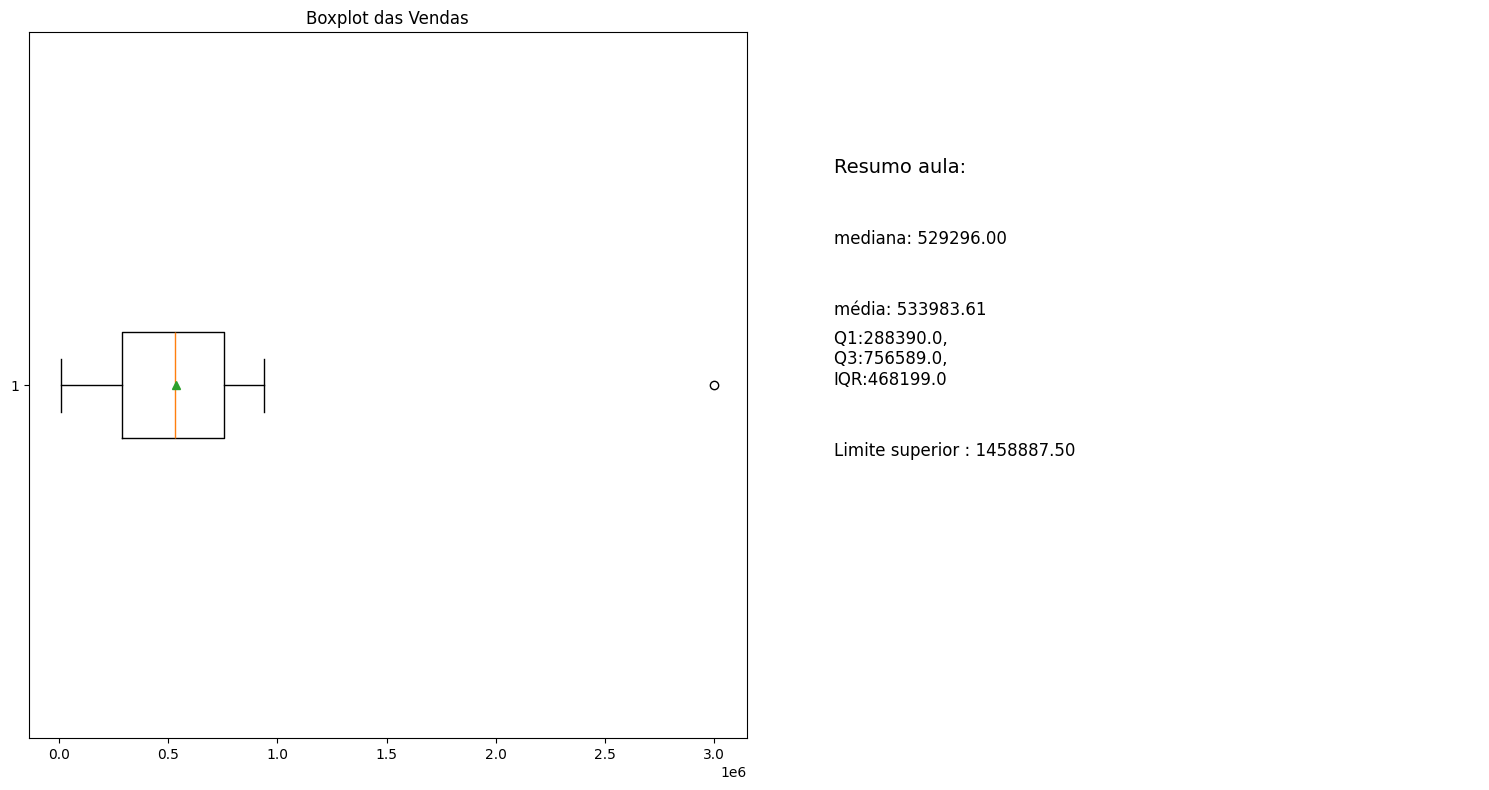

In [144]:
import random


precos = [random.randint(1000, 1000000) for i in range(100)]
vendedores = [f"Vendedor {i+1}" for i in range(100)]
print(vendedores)
vendas = {'vendedores': vendedores, 'valoresVendidos': precos}

vendedores.append("Vendedor X")
precos.append(3000000)

df = pd.DataFrame(vendas)
df.sort_values(by='valoresVendidos', ascending=False, inplace=True)

valores = np.array(precos)
media = np.mean(valores)
mediana = np.median(valores)
q1 = np.percentile(valores, 25)
q3 = np.percentile(valores, 75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

print("=== Estatísticas ===")
print(f"Média: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Q1 (25%): {q1:.2f}")
print(f"Q3 (75%): {q3:.2f}")
print(f"IQR: {iqr:.2f}")
print(f"Limite superior (outliers): {limite_superior:.2f}")

outliers = df[
    df["valoresVendidos"] > limite_superior
]

fig, axs = plt.subplots(1, 2, figsize=(15, 8))

axs[0].boxplot(df['valoresVendidos'], vert=False, showmeans=True)
axs[0].set_title('Boxplot das Vendas')

axs[1].axis('off')
axs[1].text(0.1, 0.8, 'Resumo aula:', fontsize=14)
axs[1].text(0.1, 0.6, f'média: {media:.2f}', fontsize=12)
axs[1].text(0.1, 0.7, f'mediana: {mediana:.2f}', fontsize=12)
axs[1].text(0.1, 0.5, f'\nQ1:{q1:}, \nQ3:{q3:}, \nIQR:{iqr:}', fontsize=12)
axs[1].text(0.1, 0.4, f'Limite superior : {limite_superior:.2f}', fontsize=12)


plt.tight_layout()
plt.show()


In [146]:
dados_array = np.array([2,4,6,8,10])
media = np.mean(dados_array)
variancia = np.var(dados_array)
desvio_padrao = np.std(dados_array)
coeficiente_variacao = desvio_padrao / media
distancia_variancia = variancia / (media ** 2)
print(f"Média: {media}")
print(f"Variância: {variancia}") 
print(f"Desvio Padrão: {desvio_padrao}")
print(f"Coeficiente de Variação: {coeficiente_variacao}")
print(f"Distância da Variância em relação à Média: {distancia_variancia}")

Média: 6.0
Variância: 8.0
Desvio Padrão: 2.8284271247461903
Coeficiente de Variação: 0.47140452079103173
Distância da Variância em relação à Média: 0.2222222222222222


In [ ]:
top25 = apreensoes_municipio[apreensoes_municipio['aaapai'] > q3]

print("\nMunicípios acima do 3º quartil (25% com mais apreensões):")
print(top25)

top25.to_csv('top25_apreensoes_baixada.csv', index=False, sep=';')


In [ ]:
baseDP_capital = baseDP[baseDP['regiao'] == 'Capital']
baseDP_capital.head(20)

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,0,...,NaN,NaN,21,2,0,0,0,0,578,3
1,4,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,15,6,0,1,0,0,441,3
2,5,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,47,2,1,0,0,0,637,3
3,6,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,6,...,NaN,NaN,26,2,1,0,0,0,473,3
4,7,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,4,...,NaN,NaN,10,1,3,0,0,0,147,3
5,9,1,2003,2003m01,2,1,Rio de Janeiro,3304557,Capital,1,...,NaN,NaN,36,3,0,0,0,0,554,3
6,10,1,2003,2003m01,2,1,Rio de Janeiro,3304557,Capital,1,...,NaN,NaN,40,2,3,0,0,0,593,3
7,12,1,2003,2003m01,19,1,Rio de Janeiro,3304557,Capital,2,...,NaN,NaN,48,3,0,0,0,0,620,3
8,13,1,2003,2003m01,19,1,Rio de Janeiro,3304557,Capital,0,...,NaN,NaN,26,1,0,0,0,0,455,3
9,14,1,2003,2003m01,23,1,Rio de Janeiro,3304557,Capital,0,...,NaN,NaN,43,2,2,0,0,0,636,3


In [ ]:
BaseDP_estelionato = baseDP_capital.groupby('cisp')['estelionato'].sum().reset_index()
BaseDP_estelionato

,cisp,estelionato
0,1,27293
1,4,6918
2,5,21417
3,6,7226
4,7,2182
5,9,17092
6,10,19249
7,11,1293
8,12,21174
9,13,11509


In [ ]:
valores = np.array(BaseDP_estelionato["estelionato"])

media = np.mean(valores)
mediana = np.median(valores)

q1 = np.percentile(valores, 25)
q3 = np.percentile(valores, 75)
iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

print("=== Estatísticas ===")
print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Q1 (25%): {q1}")
print(f"Q3 (75%): {q3}")
print(f"IQR: {iqr}")
print(f"Limite superior (outliers): {limite_superior}")


outliers = BaseDP_estelionato[
    BaseDP_estelionato["estelionato"] > limite_superior
]

print("\nDelegacias que destoam (acima do limite superior):")
print(outliers)

top_25 = BaseDP_estelionato[
    BaseDP_estelionato["estelionato"] >= q3
]

print("\nDelegacias acima do 3º quartil (Top 25% dos casos):")
print(top_25)


top_25.to_csv("top25_estelionato_capital.csv", index=False, sep=";")



=== Estatísticas ===
Média: 14139.738095238095
Mediana: 13114.5
Q1 (25%): 7674.5
Q3 (75%): 18416.75
IQR: 10742.25
Limite superior (outliers): 34530.125

Delegacias que destoam (acima do limite superior):
    cisp  estelionato
12    16        41003
31    35        38234

Delegacias acima do 3º quartil (Top 25% dos casos):
    cisp  estelionato
0      1        27293
2      5        21417
6     10        19249
8     12        21174
10    14        18586
12    16        41003
15    19        20340
28    32        32570
30    34        23101
31    35        38234
38    42        19272


In [ ]:
# 1. Filtrar Região dos Lagos
regiao_lagos = ['Araruama', 'Arraial do Cabo', 'Búzios', 'Cabo Frio', 
                'Iguaba Grande', 'São Pedro da Aldeia', 'Saquarema',
                'Silva Jardim', 'Maricá', 'Rio das Ostras']

lagos = baseDP[baseDP['munic'].isin(regiao_lagos)]

# 2. Somar cada tipo de crime
crimes_violentos = ['hom_doloso', 'lesao_corp_dolosa', 'lesao_corp_morte', 
                   'latrocinio', 'cvli', 'letalidade_violenta', 'estupro', 
                   'tentat_hom', 'hom_por_interv_policial']

total_por_crime = lagos[crimes_violentos].sum()

# 3. Calcular desvio (simples)
media = total_por_crime.mean()
desvio_relativo = (total_por_crime - media) / media

# 4. Encontrar o que mais destoa
crime_mais_destoa = desvio_relativo.idxmax()
valor_destoa = desvio_relativo.max()

print("📊 Total de cada crime violento na Região dos Lagos:")
print(total_por_crime.sort_values(ascending=False))

print(f"\n🎯 O crime que MAIS destoa é: {crime_mais_destoa}")
print(f"📈 Está {valor_destoa:.1%} acima da média dos crimes")
print(f"🔢 Número absoluto: {total_por_crime[crime_mais_destoa]:.0f} casos")

In [ ]:

# 1. Filtrar Região dos Lagos
regiao_lagos = ['Araruama', 'Arraial do Cabo', 'Búzios', 'Cabo Frio', 
                'Iguaba Grande', 'São Pedro da Aldeia', 'Saquarema',
                'Silva Jardim', 'Maricá', 'Rio das Ostras']

lagos = baseDP[baseDP['munic'].isin(regiao_lagos)]

# 2. Somar cada tipo de crime
crimes_violentos = ['hom_doloso', 'lesao_corp_dolosa', 'lesao_corp_morte', 
                   'latrocinio', 'cvli', 'letalidade_violenta', 'estupro', 
                   'tentat_hom', 'hom_por_interv_policial']

total_por_crime = lagos[crimes_violentos].sum()

# 3. Calcular quartis
Q3 = total_por_crime.quantile(0.75)
limite_superior = Q3 + 1.5 * (total_por_crime.quantile(0.75) - total_por_crime.quantile(0.25))

# 4. Identificar outliers
outliers = total_por_crime[total_por_crime > limite_superior]

# 5. Criar DataFrame para salvar
resultado = pd.DataFrame({
    'crime': total_por_crime.index,
    'total_casos': total_por_crime.values,
    'e_outlier': total_por_crime.index.isin(outliers.index)
})

# 6. Salvar em CSV
resultado.to_csv('crimes_violentos_lagos.csv', index=False, sep=';')

print("✅ Salvo em 'crimes_violentos_lagos.csv'")
print("\n📊 Resultados salvos:")
print(resultado)

✅ Salvo em 'crimes_violentos_lagos.csv'

📊 Resultados salvos:
                     crime  total_casos  e_outlier
0               hom_doloso         6338      False
1        lesao_corp_dolosa        83014       True
2         lesao_corp_morte           49      False
3               latrocinio          179      False
4                     cvli         6566      False
5      letalidade_violenta         7072      False
6                  estupro         7166      False
7               tentat_hom         6060      False
8  hom_por_interv_policial          506      False


In [ ]:

aisp_agrupado = baseDP.groupby('aisp')['registro_ocorrencias'].mean().reset_index()

# Calcular quartis para identificar outliers
Q1 = aisp_agrupado['registro_ocorrencias'].quantile(0.25)
Q3 = aisp_agrupado['registro_ocorrencias'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR

aisp_outliers = aisp_agrupado[aisp_agrupado['registro_ocorrencias'] > limite_superior]


aisp_outliers['registro_ocorrencias'] = aisp_outliers['registro_ocorrencias'].round(0).astype(int)

print("📊 Média de Registros de Ocorrências por AISP:")
print(aisp_agrupado.sort_values('registro_ocorrencias', ascending=False))

print(f"\n📈 Estatísticas:")
print(f"Q1: {Q1:.0f}")
print(f"Q3: {Q3:.0f}") 
print(f"IQR: {IQR:.0f}")
print(f"Limite Superior (outliers): {limite_superior:.0f}")

print("\n🚨 AISPs que destoam (acima do limite superior):")
print(aisp_outliers)

aisp_outliers.to_csv('aisp_outliers_ocorrencias.csv', index=False, sep=';', float_format='%.0f')
print("\n✅ Salvo em 'aisp_outliers_ocorrencias.csv'")

📊 Média de Registros de Ocorrências por AISP:
    aisp  registro_ocorrencias
39    40           1513.416667
20    21           1424.736059
21    22           1187.088235
30    31           1135.124726
38    39           1053.385870
13    14            961.472136
12    13            939.323232
17    18            846.137072
40    41            790.482955
14    15            742.595588
16    17            728.540441
6      7            718.123162
1      2            717.020221
19    20            714.151971
26    27            703.296380
15    16            682.671074
8      9            681.011054
4      5            676.459977
5      6            660.138441
18    19            634.042279
3      4            604.400778
2      3            543.561765
22    23            469.721168
11    12            469.384191
25    26            372.411765
27    28            370.594235
0      1            335.299020
24    25            310.110066
7      8            310.061345
31    32            298.

C:\Users\PC\AppData\Local\Temp\ipykernel_23384\206431091.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aisp_outliers['registro_ocorrencias'] = aisp_outliers['registro_ocorrencias'].round(0).astype(int)
